In [1]:
import pandas as pd
import numpy as np
from scipy.misc import imread
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
import pathlib

In [2]:
root = pathlib.Path("..") / "tgs_data" / "train"

images = root / "images"
masks = root / "masks"

ids = map(lambda f:f.stem, images.glob("*png"))

In [3]:
def get_img_data(img_id):
    img_file = images / (img_id+".png")
    mask_file = masks / (img_id+".png")
    img_data = (imread(img_file, mode='L')/2).astype('float16')/256
    mask = imread(mask_file, mode='L') > 0
    return img_data, mask

In [4]:
def plot_results(img_data, masks=[]):
    plt.figure()
    cols = 1+len(masks)
    plt.subplot(1, cols, 1)
    plt.imshow(img_data)
    for i, mask in enumerate(masks):
        plt.subplot(1, cols, 2+i)
        masked = .5 + img_data * np.where(mask, .5, -.5)
        plt.imshow(masked, cmap='seismic', norm=Normalize(0,1))

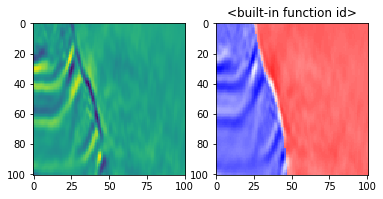

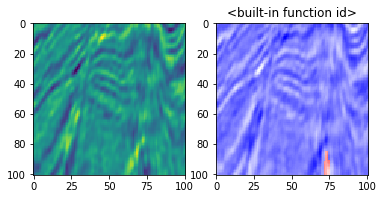

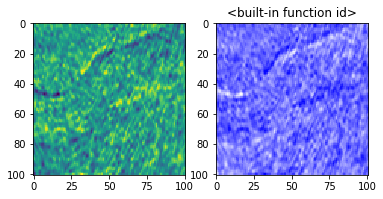

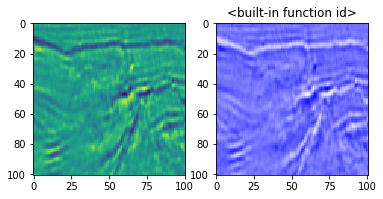

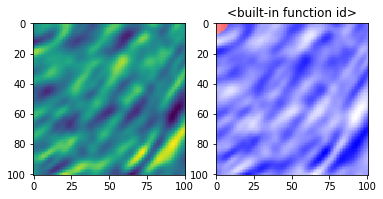

In [5]:
for i, img_id in enumerate(ids):
    if i>=5: break
    img_data, mask = get_img_data(img_id)
    plot_results(img_data, [mask])
    plt.title(f"{id}")